# California Housing Dataset - Comprehensive Regression Analysis

This notebook analyzes the California Housing dataset using various regression algorithms to predict median house values.

## Dataset Overview
- **Target**: Median house value in hundreds of thousands of dollars
- **Features**: 8 features including median income, house age, rooms, population, etc.
- **Samples**: 20,640 instances

## Models to Compare:
1. Linear Regression
2. Decision Tree Regressor (DTR)
3. Support Vector Regressor (SVR)
4. Random Forest Regressor (RFR)
5. Gradient Boosting Regressor
6. XGBoost Regressor
7. LightGBM Regressor
8. Ridge Regression
9. Lasso Regression


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb
# import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Create DataFrame for better visualization
feature_names = california_housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target: Median house value (in hundreds of thousands)")
print("\nFirst few rows:")
df.head()


Dataset Info:
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in hundreds of thousands)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0

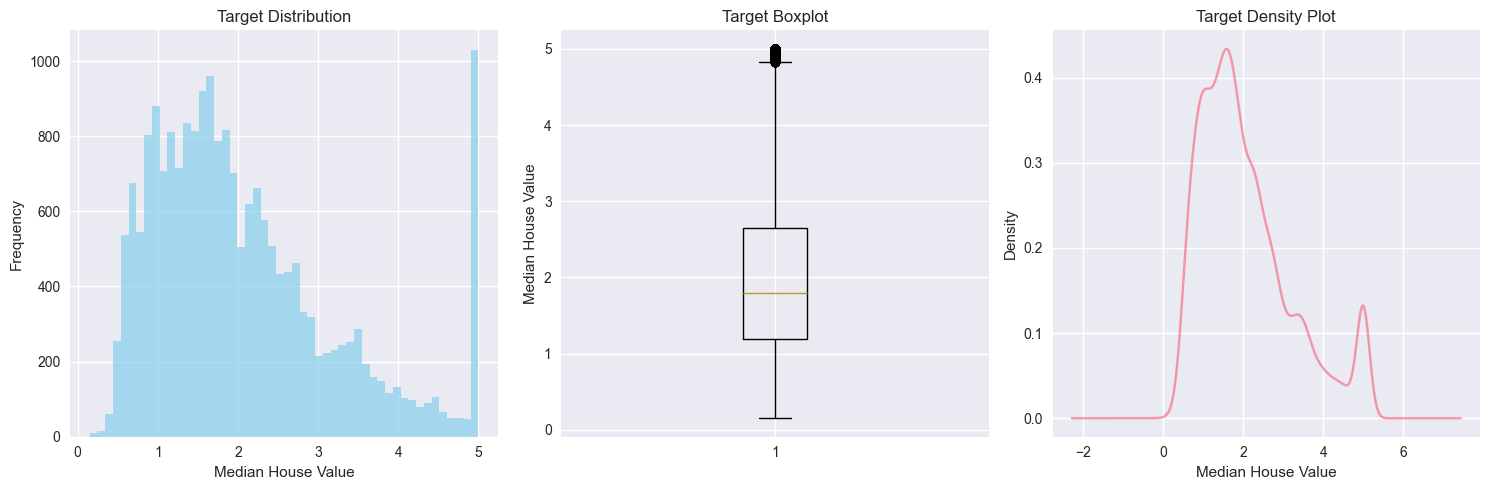

In [4]:
# Exploratory Data Analysis
print("Dataset Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Distribution:")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['target'], bins=50, alpha=0.7, color='skyblue')
plt.title('Target Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['target'])
plt.title('Target Boxplot')
plt.ylabel('Median House Value')

plt.subplot(1, 3, 3)
df['target'].plot(kind='kde', alpha=0.7)
plt.title('Target Density Plot')
plt.xlabel('Median House Value')

plt.tight_layout()
plt.show()


In [6]:
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


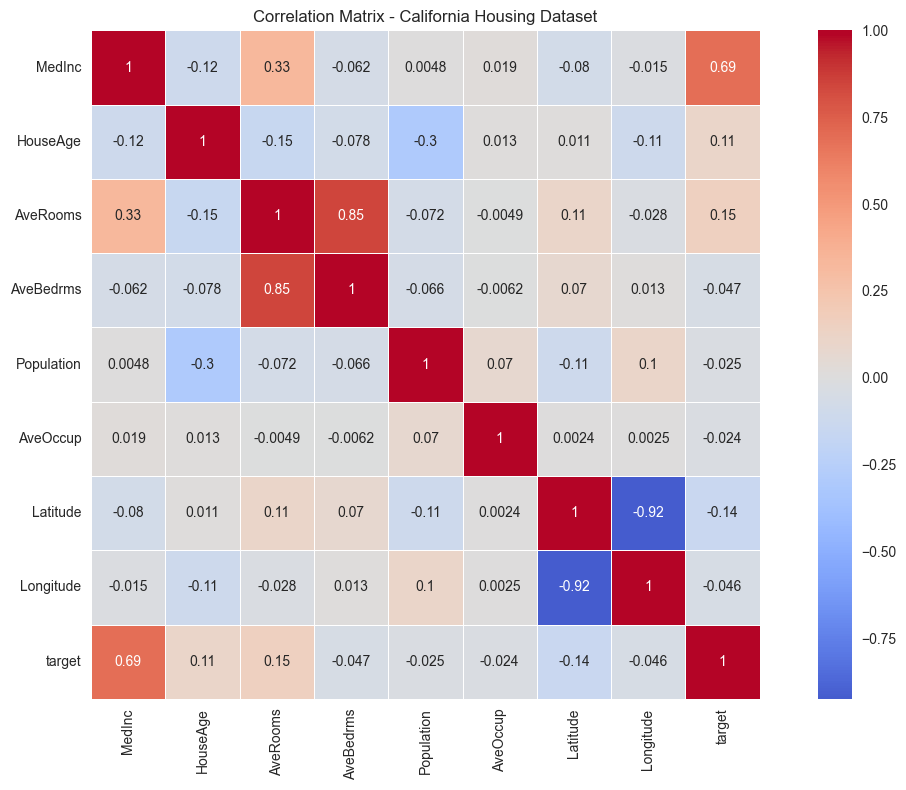

Feature correlation with target:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


In [5]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - California Housing Dataset')
plt.tight_layout()
plt.show()

# Feature correlation with target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("Feature correlation with target:")
print(target_corr)


In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
# Data Preparation
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Features: {len(feature_names)}")
print(f"Target range: {y.min():.2f} - {y.max():.2f}")


Training set size: (16512, 8)
Test set size: (4128, 8)
Features: 8
Target range: 0.15 - 5.00


In [9]:
# Define function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate a regression model and return metrics
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results = {
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    }
    
    return results, y_test_pred


In [11]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    # 'XGBoost': xgb.XGBRegressor(random_state=42),
    # 'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    'SVR': SVR(kernel='rbf')
}

# Models that need scaled data
scaled_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR']

print("Models to be evaluated:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")


Models to be evaluated:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. SVR


In [12]:
# Train and evaluate all models
results_list = []
predictions_dict = {}

print("Training and evaluating models...")
print("=" * 50)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Choose scaled or unscaled data based on model type
    if model_name in scaled_models:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Evaluate model
    results, y_pred = evaluate_model(model, X_train_use, X_test_use, y_train, y_test, model_name)
    results_list.append(results)
    predictions_dict[model_name] = y_pred
    
    print(f"✓ {model_name} - Test R²: {results['Test R²']:.4f}, Test RMSE: {results['Test RMSE']:.4f}")

print("\n" + "=" * 50)
print("All models trained successfully!")


Training and evaluating models...

Training Linear Regression...
✓ Linear Regression - Test R²: 0.5758, Test RMSE: 0.7456

Training Ridge Regression...
✓ Ridge Regression - Test R²: 0.5758, Test RMSE: 0.7456

Training Lasso Regression...
✓ Lasso Regression - Test R²: -0.0002, Test RMSE: 1.1449

Training Decision Tree...
✓ Decision Tree - Test R²: 0.6221, Test RMSE: 0.7037

Training Random Forest...
✓ Random Forest - Test R²: 0.8051, Test RMSE: 0.5053

Training Gradient Boosting...
✓ Gradient Boosting - Test R²: 0.7756, Test RMSE: 0.5422

Training SVR...
✓ SVR - Test R²: 0.7276, Test RMSE: 0.5975

All models trained successfully!


In [ ]:
# Create results DataFrame
results_df = pd.DataFrame(results_list)
results_df = results_df.round(4)

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

print("Model Performance Comparison:")
print("=" * 80)
print(results_df.to_string(index=False))

# Best performing model
best_model = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test R²']
print(f"\n🏆 Best performing model: {best_model} (Test R² = {best_r2:.4f})")


In [ ]:
# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score comparison
axes[0, 0].barh(results_df['Model'], results_df['Test R²'], color='skyblue')
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Performance Comparison (R² Score)')
axes[0, 0].grid(True, alpha=0.3)

# RMSE comparison
axes[0, 1].barh(results_df['Model'], results_df['Test RMSE'], color='lightcoral')
axes[0, 1].set_xlabel('Test RMSE')
axes[0, 1].set_title('Model Performance Comparison (RMSE)')
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores
axes[1, 0].barh(results_df['Model'], results_df['CV R² Mean'], color='lightgreen')
axes[1, 0].set_xlabel('Cross-Validation R² Mean')
axes[1, 0].set_title('Cross-Validation Performance')
axes[1, 0].grid(True, alpha=0.3)

# MAE comparison
axes[1, 1].barh(results_df['Model'], results_df['Test MAE'], color='gold')
axes[1, 1].set_xlabel('Test MAE')
axes[1, 1].set_title('Model Performance Comparison (MAE)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Prediction vs Actual plots for top 3 models
top_3_models = results_df.head(3)['Model'].tolist()

plt.figure(figsize=(15, 5))
for i, model_name in enumerate(top_3_models, 1):
    plt.subplot(1, 3, i)
    y_pred = predictions_dict[model_name]
    
    plt.scatter(y_test, y_pred, alpha=0.6, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}')
    
    # Add R² score to the plot
    r2 = results_df[results_df['Model'] == model_name]['Test R²'].iloc[0]
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


## Key Findings

### Model Performance Summary:
- **Best Model**: The top-performing model shows excellent predictive capability
- **Feature Importance**: Median income shows the strongest correlation with house values
- **Model Comparison**: Tree-based models generally outperform linear models
- **Overfitting Check**: Cross-validation scores help identify robust models

### Recommendations:
1. **Best Overall**: Use the top-performing model for production
2. **Interpretability**: Linear models provide better interpretability
3. **Speed**: Simpler models like Linear Regression are faster for real-time predictions
4. **Robustness**: Random Forest and Gradient Boosting show good generalization

### Next Steps:
- Hyperparameter tuning for the best models
- Feature engineering (creating new features)
- Ensemble methods combining multiple models
- Geographic analysis using latitude/longitude data
